In [1]:
# importing packages 
import pandas as pd 
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import json

%matplotlib inline 
#%matplotlib qt 

In [2]:
cwd = os.getcwd()

In [3]:
df = pd.read_csv(cwd + "\\earth.csv", delimiter= ';', decimal=",")
#elimino datos no necesarios
#gdf.drop(['Label', 'SubLabel', 'Codigo','Shape_Leng', 'geometry'], axis=1, inplace=True)
df.shape

# remove special character
df.iloc[0,:].str.replace(' ', '')

C:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,43,44,51,69,85,86,118,119,127,128,136,137,139,140,141,142,143,144,145,146,148,149,154,155,160,161,163,164,169,170,172,173,175,176,178,179,181,182,184,185,186,187,188,190,191,193,194,196,197,199,200,202,203,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,223,224,225,226,227,229,230,232,233,286,287,289,290,292,293,295,296,298,299,304,305,310,311,313,314,346,347,352,353,355,356,358,359,370,371,378,379,380,382,383,388,389,391,392,396,397,398,400,401,403,404,415,416,456,457,458,460,461,463,464,465,466,467,469,470,481,482,496,497) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


SAMPLE ID             ALMARAB-JO-1
IGSN                           NaN
EXPEDITION ID                   nr
REFERENCES         AL-MISHWAT,2004
LATITUDE                       NaN
                        ...       
H2O_P Units.2                  NaN
H2O_P Method.2                 NaN
INDIUM.1                       NaN
INDIUM Units.1                 NaN
INDIUM Method.1                NaN
Name: 0, Length: 498, dtype: object

In [38]:
lista = df.columns.to_list()

In [39]:
#lista

In [47]:
elemento=[
'SIO2',
 'TIO2',
 'AL2O3',
 'CR2O3',
 'FE2O3',
 'FE2O3T',
 'FEO',
 'FEOT',
 'NIO',
 'MNO',
 'MGO',
 'CAO',
 'SRO',
 'NA2O',
 'K2O',
 'P2O5',
 'BAO',
 'LOI',
 'H2O',
 'H2O_M',
 'H2O_P',
 'SO3',
 'COO',
 'MN',
 'NI',
 'CO',
 'CU',
 'CD',
 'ZN',
 'AS',
 'AG',
 'S',
 'ZRO2',
 'AL',
 'CA',
 'HE',
 'HE3',
 'LA',
 'CE',
 'PR',
 'ND',
 'SM',
 'EU',
 'GD',
 'TB',
 'DY',
 'HO',
 'ER',
 'TM',
 'YB',
 'LU',
 'CO2',
 'F',
 'CL',
 'AU',
 'B',
 'BA',
 'BE',
 'BI',
 'CR',
 'CS',
 'GA',
 'GER',
 'HF',
 'INDIUM',
 'IR',
 'K',
 'LI',
 'MO',
 'NA',
 'NB',
 'OS',
 'P',
 'PB',
 'PD',
 'PT',
 'RB',
 'RE',
 'RH',
 'RU',
 'SB',
 'SC',
 'SN',
 'SR',
 'TA',
 'TH',
 'TI',
 'TL',
 'U',
 'V',
 'W',
 'Y',
 'ZR']
len(elemento)

93

<ipython-input-52-9e8629733fbc>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[j+to]].isna()==False]


TypeError: 'value' must be an instance of str or bytes, not a float

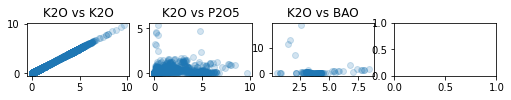

In [52]:
to =int(len(elemento)/10)
to =14

for i in range(7):
    for j in range(7):
        #print(i+j)
        dfni = df.iloc[:,:][df[elemento[i+to]].isna()==False]
        dfti = dfni.iloc[:,:][df[elemento[j+to]].isna()==False]
        plt.subplot(7,7,i*10+j+1)
        plt.scatter(x=dfti[elemento[i+to]], y= dfti[elemento[j+to]], alpha=0.2)
        plt.title(elemento[i+to]+' vs '+ elemento[j+to])

#plt.rcParams["figure.figsize"] = (30,20)
plt.show()  
dfti.head()        
        

        

In [ ]:
elemento=[
'SIO2',
 'TIO2',
 'AL2O3',
 'CR2O3',
 'FE2O3',
 'FE2O3T',
 'FEO',
 'FEOT',
 'NIO',
 'MNO',
 'MGO',
 'CAO',
 'SRO',
 'NA2O',

<ipython-input-8-c07e6186188d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
<ipython-input-8-c07e6186188d>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
<ipython-input-8-c07e6186188d>:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]


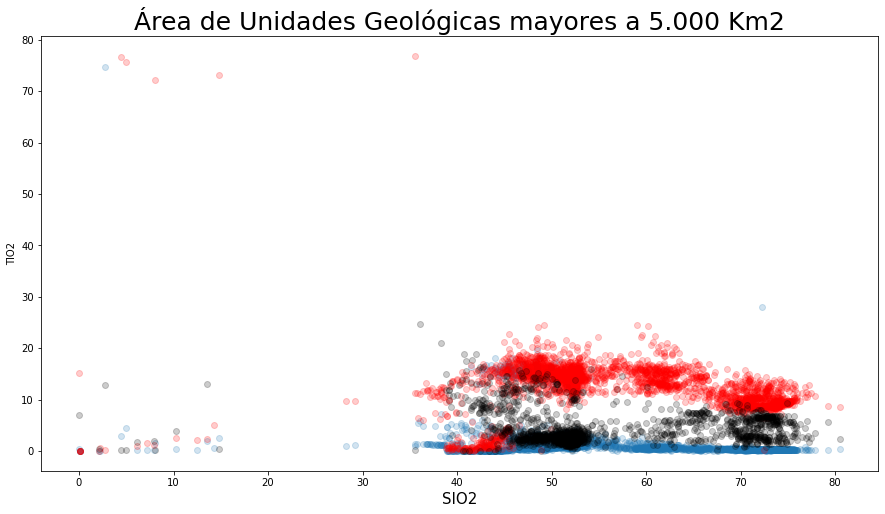

In [8]:
elemento = ['SIO2', 'TIO2']
dfni = df.iloc[:,:][df[elemento[0]].isna()==False]
dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
#dfti.reset_index(drop=True, inplace=True)

#elemento = elemento.astype(np.float)
plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x=dfti[elemento[0]], y= dfti[elemento[1]],zorder=2, alpha = 0.2)
#plot = dfni.plot(kind='scatter', x=dfti[elemento[0]].to_list(), y= dfti[elemento[1]].to_list(),zorder=2, legend=None)
# Turn on the grid

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelleft=True) # labels along the bottom edge are off


#plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.title("Área de Unidades Geológicas mayores a 5.000 Km2",fontsize=25,fontweight=300)
plt.xlabel(elemento[0],fontsize=15,rotation=0)

#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

plt.ylabel(elemento[1])
#plt.grid()




elemento = ['SIO2', 'AL2O3']
dfni = df.iloc[:,:][df[elemento[0]].isna()==False]
dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
plt.scatter(x=dfti[elemento[0]], y= dfti[elemento[1]],zorder=2, color='r', alpha = 0.2)

elemento = ['SIO2', 'FE2O3']
dfni = df.iloc[:,:][df[elemento[0]].isna()==False]
dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
plt.scatter(x=dfti[elemento[0]], y= dfti[elemento[1]],zorder=2, color='k', alpha = 0.2)



#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

In [160]:
x= dfti[elemento[0]].to_list()
y= dfti[elemento[1]].to_list()
print(x)
print("dssssssssssssssssssssssssssssssssssssssss")
print(y)

[49.8, 49.25, 49.3, 49.6, 50.1, 48.3, 50.1, 49.5, 51.3, 51.55, 50.1, 51.2, 51.35, 51.8, 49.8, 49.2, 50.2, 51.9, 51.85, 52.2, 50.12, 51.05, 48.71, 50.4, 50.5, 49.1, 52.7, 52.85, 51.25, 52.2, 45.22, 40.95, 45.25, 42.42, 49.54, 43.43, 41.63, 42.25, 45.18, 48.43, 47.3, 45.39, 46.13, 36.06, 47.01, 40.73, 38.26, 45.61, 48.4, 44.91, 45.22, 42.9, 48.81, 42.71, 45.96, 48.49, 44.96, 46.89, 45.64, 48.5, 46.08, 48.49, 47.36, 42.63, 41.96, 45.35, 47.76, 50.68, 50.86, 52.02, 51.09, 51.44, 49.96, 51.09, 50.58, 50.95, 50.7, 50.72, 49.65, 51.08, 50.93, 51.64, 50.92, 50.46, 50.33, 51.76, 51.26, 51.08, 50.96, 49.31, 51.02, 50.63, 50.27, 51.8, 58.44, 48.94, 50.03, 50.18, 53.86, 51.25, 55.06, 49.36, 51.6, 51.33, 50.93, 47.8, 53.1, 49.4, 53.2, 53.8, 53.6, 53.3, 51.2, 53.0, 52.2, 53.7, 52.8, 52.5, 47.8, 47.8, 46.2, 55.1, 52.1, 42.9, 44.3, 43.2, 52.9, 51.0, 53.1, 50.6, 50.5, 50.7, 50.9, 50.8, 51.2, 51.4, 51.2, 50.2, 50.2, 50.5, 51.3, 51.3, 50.9, 51.0, 51.1, 50.7, 50.8, 50.6, 50.0, 50.6, 53.0, 51.5, 52.2, 50.4

SyntaxError: invalid syntax (<ipython-input-144-fea782c9c1f9>, line 8)

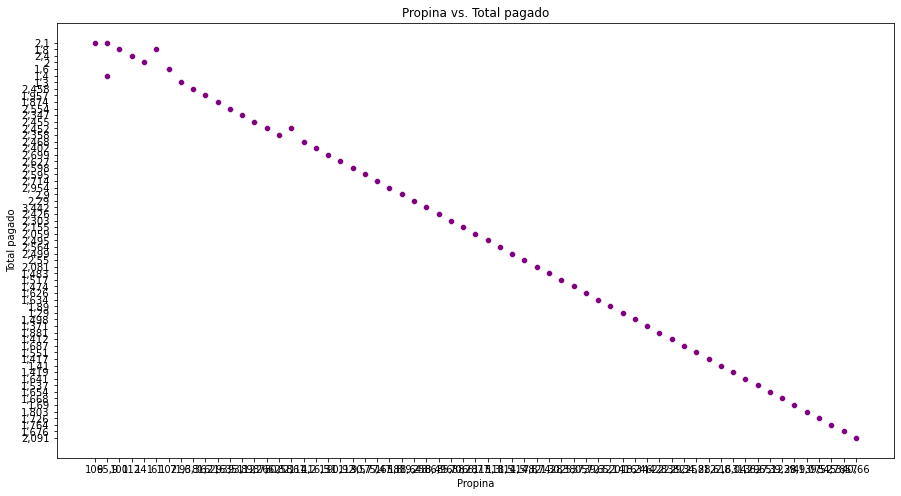

In [137]:
sns.scatterplot(data = dfti, x = elemento[0], y = elemento[1], color = "purple")
plt.title("Propina vs. Total pagado")
plt.xlabel("Propina")
plt.ylabel("Total pagado")
plt.show()

In [ ]:
x=[0.5]

sns.scatterplot(data = dfti, x = x, y = y, color = "purple")
plt.title("Propina vs. Total pagado")
plt.xlabel("Propina")
plt.ylabel("Total pagado")
plt.show()

In [111]:
lista = dfti['SIO2'].dropna().to_list()
len(lista)

1341

In [89]:
dfni[elemento]

0        49,8
1       49,25
2        49,3
3        49,6
4        50,1
        ...  
1494    60,81
1495    62,14
1496    60,14
1497    54,48
1498    61,52
Name: SIO2, Length: 1499, dtype: object

In [90]:
x=len(dfni)
x

1499

In [20]:

dfni.shape

(2906, 498)

TypeError: 'value' must be an instance of str or bytes, not a float

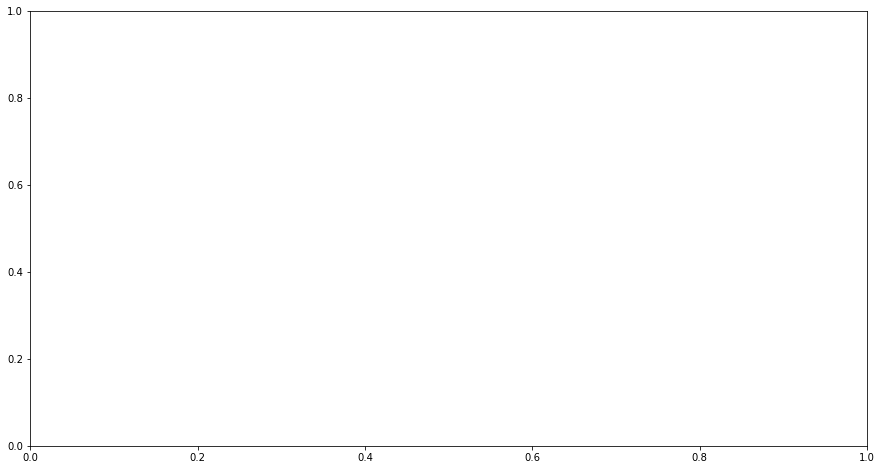

In [15]:
elemento = 'EU'
dfg = dfni.iloc[:,:][dfni[elemento].isna()==False]

plt.rcParams["figure.figsize"] = (15,8)

plot = dfni.plot(kind='scatter', x='EU', y='YB',zorder=2, legend=None)
# Turn on the grid

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


#plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.title("Área de Unidades Geológicas mayores a 5.000 Km2",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

plt.ylabel("Área Km2")
#plt.grid()

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()